# Image Transformations

Image transformations are fundamental techniques in digital image processing that involve altering the appearance or properties of an image. These transformations encompass a wide range of operations, including resizing, rotating, cropping, enhancing, and applying filters, all aimed at manipulating visual content to achieve desired outcomes.

In [1]:
#import important libraries
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

## Linear - Negative Transformation
in this transformation, The negative of an image with gray levels in the range [0, L-1] is obtained
by using the negative transformation shown below, which is given by the
expression ``𝑠 = 𝐿 − 1 − 𝑟`` 
* where L represents number of levels 
* r represents original pixel value 
* s represents new pixel value

In [2]:
# pre-defiend funtion to display an image using matplotlib
def imshow(image):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) #we are working on gray scal
    plt.imshow(image,cmap='gray')
    plt.show()

In [3]:
orig_img = cv2.imread('Nature.jpg')  #loading our image

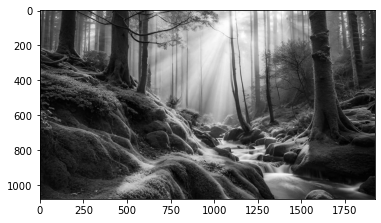

In [4]:
imshow(orig_img) #displaying our image

let's find out number of level in our image

In [5]:
print(f"Data type of our image :{orig_img.dtype}")

Data type of our image :uint8


it's unsigned integer with 8 bits , we can have 256 different levels, so ``L=256``

In [6]:
L = 256
gray_img = cv2.cvtColor(orig_img,cv2.COLOR_BGR2GRAY)
negaitve_image = 256 - 1 - gray_img

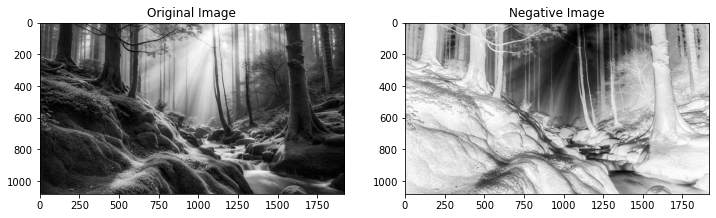

In [7]:
fig = plt.figure(figsize=(12,6))
ax1,ax2 = fig.subplots(1,2)
ax1.imshow(gray_img,cmap = 'gray')
ax1.set_title('Original Image')
ax2.imshow(negaitve_image,cmap = 'gray')
ax2.set_title('Negative Image')
plt.show();

## Log Transformations
this transformation maps a narrow range of low gray-level values in the input image into a wider range of output levels.
The general form of the log transformation is `` S = c.log(1+r)``
* c is constant to ensure the transformed image have the same range of values as original image
* we added 1 into the log funtion because of black pixels have intenisty 0 and log of 0 isn't defined

In [8]:
# we use following formula to get c
epslion = 1e-6   # to avoid dividing by zero
c = (L-1)/(np.log(1+np.max(gray_img))+epslion)
log_img = np.array(np.multiply(c,np.log(1+gray_img+epslion)),dtype='uint8')

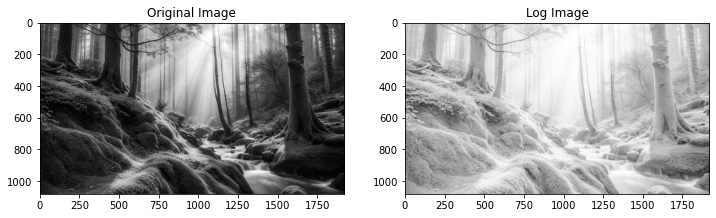

In [9]:
fig = plt.figure(figsize=(12,6))
ax1,ax2 = fig.subplots(1,2)
ax1.imshow(gray_img,cmap = 'gray')
ax1.set_title('Original Image')
ax2.imshow(log_img,cmap = 'gray')
ax2.set_title('Log Image')
plt.show();

## Power-Law Transformation 
As with log transformations, power-law curves with fractional values of g map
a narrow range of dark input values into a wider range of output values, with the
opposite being true for higher values of input levels

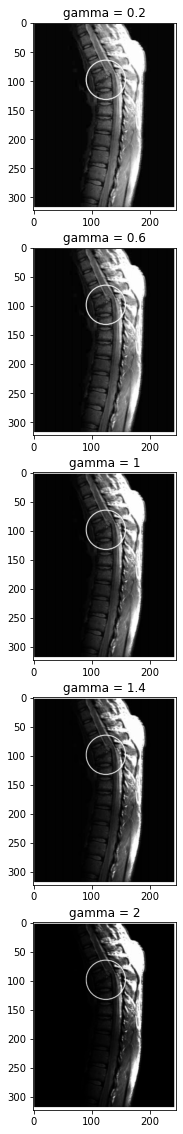

In [10]:
test_img = cv2.imread('MRI.PNG')
test_gray_img = cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)
gammas = [0.2,0.6,1,1.4,2]       #different values of gamma
fig = plt.figure(figsize=(10,20))
axes = fig.subplots(5,1)
for idx,gamma in enumerate(gammas):
    power_image = 255*(test_gray_img/255)**gamma  #we divided by 255 and then mutplied by it to get faster computations 
    power_image = np.array(power_image,dtype='uint8')  #conver image to numpy array with uint8 data type
    axes[idx].imshow(power_image,cmap='gray')
    axes[idx].set_title(f"gamma = {gamma}")

we can summraze all of these transformations in the following graph


![basic intensity transformation functions](curves.PNG)

# Additional Resources
[OpenCv docs](https://docs.opencv.org/4.9.0/d6/d00/tutorial_py_root.html)

# Author
Amir Tarek


amir.tarek11@gmail.com